#**ANÁLISIS DEL ABANDONO DE CLIENTES DENTRO DEL SECTOR DE LAS TELECOMUNICACIONES**

* *texto en cursiva*A través de este proyecto se busca identificar cuales clientes son propensos a abandonar la empresa considerando las variables que se encuentran en el dataset, la idea es poder generar un modelo que permita a la organización enfocada en el sector de las telecomunicaciones reconocer los clientes que pueden estar en estado (o cerca) de deserción y de qué forma pueden contrarestar esta situación*

**Contexto Comercial:** la unidad de Analítica de una empresa de Telecomunicaciones del país evidencia en los Kpi's del negocio que se encuentran en una fuerte tendencia de fuga de clientes (Churn), acercándose peligrosamente a indicadores netos negativos. 

**Audiencia:** Equipo directivo de la empresa dedicada a la venta de servicios de telecomunicaciones

**Definición de objetivo:** Identificación y posterior segmentación de aquellos clientes/perfiles con baja, media y alta posibilidad de abandono y reconocer las principales razones por las cuales estan obtando por la comptencia.

**Contexto análitico:** Se dispone de una base de datos en donde cada fila representa un cliente y cada columna contiene los atributos del cliente. El equipo directivo desea identificar y entender las variables más relevantes para la fuga y poder establecer perfiles de clientes con una alta probabilidad de abandono. Finalmente aportar conocimientos del cliente que permitan a las áreas de producto poder contrarrestar este efecto que viene impactando negativamente la base de usuarios y el crecimiento de la empresa.


*Las Variables disponibles son:*
<br> -CustomerID: A unique ID that identifies each customer.
<br> -Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
<br> -Country: The country of the customer’s primary residence.
<br> -State: The state of the customer’s primary residence.
<br> -City: The city of the customer’s primary residence.
<br> -Zip Code: The zip code of the customer’s primary residence.
<br> -Lat Long: The combined latitude and longitude of the customer’s primary residence.
<br> -Latitude: The latitude of the customer’s primary residence.
<br> -Longitude: The longitude of the customer’s primary residence.
<br> -Gender: The customer’s gender: Male, Female
<br> -Senior Citizen: Indicates if the customer is 65 or older: Yes, No
<br> -Partner: Indicate if the customer has a partner: Yes, No
<br> -Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
<br> -Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
<br> -Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
<br> -Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
<br> -Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
<br> -Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
<br> -Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
<br> -Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
<br> -Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
<br> -Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
<br> -Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
<br> -CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
<br> -Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

#**ANÁLISIS EXPLORATORIO DE LOS DATOS**

In [ ]:
# Importar las librerías 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [ ]:
df_services = pd.read_excel('Internet_services.xlsx',)

In [ ]:
df_services

,CustomerID,Phone Service,Internet Service,Contract,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,...,Tabla_Clients.City,Tabla_Clients.Zip Code,Tabla_Clients.Lat Long,Tabla_Clients.Latitude,Tabla_Clients.Longitude,Tabla_Clients.Gender,Tabla_Clients.Senior Citizen,Tabla_Clients.Partner,Tabla_Clients.Dependents,Tabla_Clients.Tenure Months
0,3668-QPYBK,Yes,DSL,Month-to-month,Mailed check,53.85,108.15,Yes,1,86,...,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2.06
1,9237-HQITU,Yes,Fiber optic,Month-to-month,Electronic check,70.70,151.65,Yes,1,67,...,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2.06
2,9305-CDSKC,Yes,Fiber optic,Month-to-month,Electronic check,99.65,820.50,Yes,1,86,...,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8.24
3,7892-POOKP,Yes,Fiber optic,Month-to-month,Electronic check,104.80,3.046.05,Yes,1,84,...,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28.84
4,0280-XJGEX,Yes,Fiber optic,Month-to-month,Bank transfer (automatic),103.70,5.036.30,Yes,1,89,...,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,50.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Yes,No,Two year,Bank transfer (automatic),21.15,1.419.40,No,0,45,...,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,74.16
7039,6840-RESVB,Yes,DSL,One year,Mailed check,84.80,1.990.50,No,0,59,...,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24.72
7040,2234-XADUH,Yes,Fiber optic,One year,Credit card (automatic),103.20,7.362.90,No,0,71,...,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,74.16
7041,4801-JZAZL,No,DSL,Month-to-month,Electronic check,29.60,346.45,No,0,59,...,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11.33


In [ ]:
df_services.columns

Index(['CustomerID', 'Phone Service', 'Internet Service', 'Contract',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason',
       'Tabla_Clients.Count', 'Tabla_Clients.Country', 'Tabla_Clients.State',
       'Tabla_Clients.City', 'Tabla_Clients.Zip Code',
       'Tabla_Clients.Lat Long', 'Tabla_Clients.Latitude',
       'Tabla_Clients.Longitude', 'Tabla_Clients.Gender',
       'Tabla_Clients.Senior Citizen', 'Tabla_Clients.Partner',
       'Tabla_Clients.Dependents', 'Tabla_Clients.Tenure Months'],
      dtype='object')

## **PREGUNTAS/HIPÓTESIS**

##*Pregunta 1) Por qué motivo los clientes están abandonando la empresa? Cuales son las principales razones y son muy valiosos los clientes que abandonan?*

[Text(0.5, 1.0, 'Razones de abandono vs valor de importancia del cliente')]

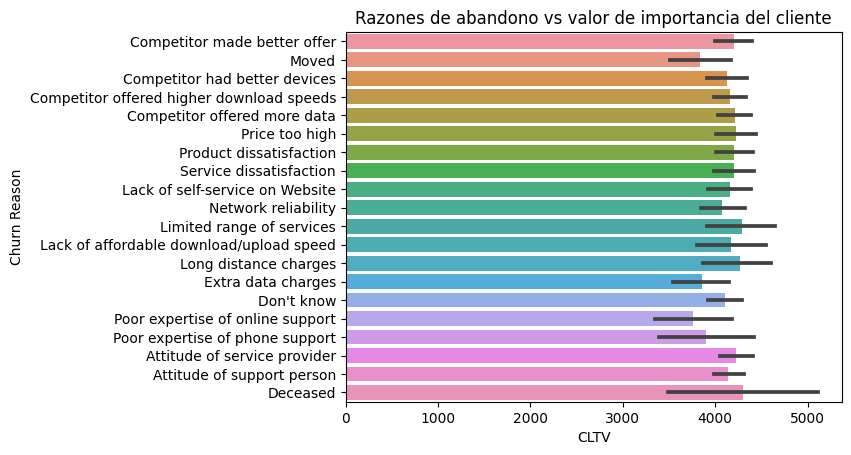

In [ ]:
sns.barplot(x = df_services['CLTV'], y = df_services['Churn Reason'],  data = df_services).set(title='Razones de abandono vs valor de importancia del cliente')


##**Análisis y recomendación**

**Análisis**

Observar la dispersión de los datos entre el indicador churn value el cual genera un valor (0-100) por cliente y entre mas alto este el dato mas posibilidad de abandonar la empresa vs los cargos totales por los servicios contratados. La idea es identificar si hay datos atipicos, en donde hay concentración de datos y si hay relación entre las dos variables.

Hay algunos datos atipicos dentro de la población de clientes, estos se caracterizan por ser clientes que estan en la banda de 0-20 en churn score y pagan por sus servicios diferentes valores desde precios bajos hasta algunos bastante elevados. 

Hay clientes que están pagando cantidades elevadas y tienen un kpi de abandono muy variado que se mueve de 20 a 100 tal como se observa en la figura, la dispersión de la grafica es realmente elevada hay muchos datos con distintos rangos de precio y kpis de churn. Se puede realizar una segmentación de precios pagados por servicios, es decir determinar rangos y de esta forma clasificar a los usuarios, esto con el proposito de reconocer cuales de ellos estan con mayor tendencia a abandonar.

**Recomendación**

El enfoque de las razones de abandono pueden dividirse de acuerdo a la motivacion del cliente de optar por otra empresa, se puede evidenciar una segmentación de posibles razones:

1-Calidad de los servicios
2-servicio postventa
3-precios/tarifas 
4-ofertas de la competencia
5-otros (como fallecido y/o cambó lugar de residencia - moved)

A partir de estos segmentación de razon de abandono se puede estructurar y desplegar planes desde diferentes areas (planeación financiera, administrativa, comercial, recursos humanos) basandose en estrategias tácticas y operacionales con el fin de mejorar significativamente dichos poblemas e impactar de forma positiva en la experencia o journey del usuario.


## *Pregunta 2) Segmentando los clientes por cargos totales, se puede ver una correlación con la tendencia de abandonar la empresa (churn score)*

In [ ]:
# pasar total charges de obj a float
df_services['Total Charges'] = pd.to_numeric(df_services['Total Charges'], errors='coerce')

In [ ]:

R1 = df_services['Total Charges'].min()
R2 = df_services['Total Charges'].quantile(0.25)
R3 = df_services['Total Charges'].median()
R4 = df_services['Total Charges'].quantile(0.75)
R5 = df_services['Total Charges'].max()


In [ ]:
labels = ['inferior','medio_bajo','medio','superior']

In [ ]:
bines_grupos = [R1,R2,R3,R4,R5]

In [ ]:
df_services['r_Charges']=pd.cut(df_services['Total Charges'], bins=bines_grupos, labels=labels)

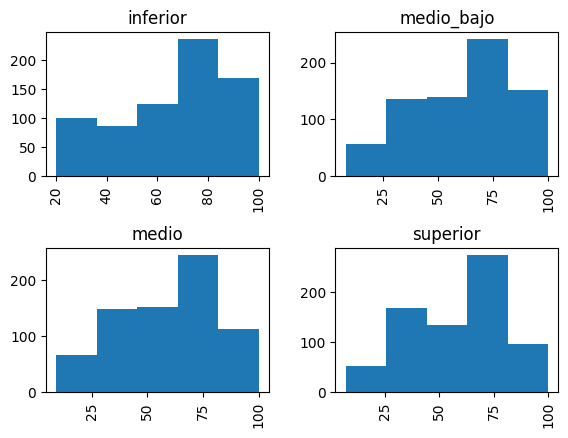

In [ ]:
df_services.hist('Churn Score',by='r_Charges', bins=5)
plt.show()

##**Análisis y recomendación**

**Análisis**

Al hacer la segmentación de los clientes por aquellos que más cargos por servicios tienes vs el churn score se puede observar de mejor forma que hay una concentracón en todos los grupos en un valor de abandono del 50 al 75, hay una fuerte tendencia de los clientes de estar en un churn score de 70-80 como se puede ver en las figuras, esto podría ser un tipo de alarma temprana para la empresa, debido a que estan acercandose al 100, es mportante recordar que si llegan a este numero (100) se catalogan como clientes perdidos. Hay una cantidad alta en los posibles clientes que estan en alta probabilida de 

**Recomendación**

Siguiendo la recomendación del punto 2) se hace una segmentación de los datos se acuerdo a la variable de Total Charges la cual dentro del modelo muestra los cargos totales generados por cada cliente de acuerdo al plan y/servicio(s) a los que estén vinculados, se hicieron rangos con el dato minimo, percentil 25, mediana, percentil 75 y el máximo, luego se realizó un histograma.

estos fueron los hallazgos:

 1 El churn score de 100 (cliente perdido) está presente en todas las segmentaciones, sin embargo, en los grupos de medio y superior la cantidad de clientes que abandonan no es tan alta obervando la grafica no logran superar los 120 clientes, mientras que en los grupos de inferior y medio_bajo superan de forma significativa los 120-150 clientes.

 2 Los clientes con un churn score de 65 a 75 son aquellos que más se repiten, en los 4 grupos superan los 200 clientes notoriamente. Esto puede ser empleado con una alerta temprana, aquellos clientes que cada vez se estén acercando al valor 100 intentar revisar que tipo de situación(es) están haciendo que el cliente considere retirarse.

Se debe hacer zoom dentro de estos clientes, son aquellos más propensos a ser pérdidos, se debe identificar los motivos determinantes que están obligando a dichos usuarios a optar por la competencia. Se puede emplear esta relación de total charges y churn score como una alerta temprana para evitar que los clientes sobrepasen el valor de 70-75.

##*Pregunta 3) Existe alguna correlación entre los cargos totales generados por cliente y el churn score?*

In [ ]:
# Churn score (mayor valor mayor posibilidad de abandono) y total charges los cargos totales en USD de los clientes
import plotly.express as px

fig = px.scatter(x = df_services['Churn Score'],
                 y = df_services.sort_values(by='Total Charges', ascending=False, inplace=True),
                 title = "Cargos totales y valor de abandono por clientes",
                 labels = {'x': 'Churn Score', 'y':'Total Charges'})

fig.show()

##**Análisis y recomendación**

**Análisis**

Observar la dispersión de los datos entre el indicador churn value el cual genera un valor (0-100) por cliente y entre mas alto este el dato mas posibilidad de abandonar la empresa vs los cargos totales por los servicios contratados. La idea es identificar si hay datos atipicos, en donde hay concentración de datos y si hay relación entre las dos variables.

Hay algunos datos atipicos dentro de la población de clientes, estos se caracterizan por ser clientes que estan en la banda de 0-20 en churn score y pagan por sus servicios diferentes valores desde precios bajos hasta algunos bastante elevados. 

Hay clientes que están pagando cantidades elevadas y tienen un kpi de abandono muy variado que se mueve de 20 a 100 tal como se observa en la figura, la dispersión de la grafica es realmente elevada hay muchos datos con distintos rangos de precio y kpis de churn. Se puede realizar una segmentación de precios pagados por servicios, es decir determinar rangos y de esta forma clasificar a los usuarios, esto con el proposito de reconocer cuales de ellos estan con mayor tendencia a abandonar.


**Recomendación**

Los datos manejan una fuerte dispersión por este motivo no se puede evidenciar ningún patrón o comportamiento en particular, se puede hacer un segmentación de los datos en la variable de cargos totales, esto con el propósito de analizar de qué forma se distribuyen los datos dependiendo de la cantidad de USD que paguen los clientes por sus servicios. Realizando esto se podría mirar si los clientes que más o menos pagan están con altos valores de churn y si hay una mayoría en los clientes que generan una alta retribución económica dentro de la empresa y así buscar una forma de evitar la decisión que tienen de finalizar la relación de servicios con la empresa.

## *Pregunta 4)  Existe una cantidad de clientes relevantes clasificados como perdidos que hacen parte del grupo de dependientes de terceros?*

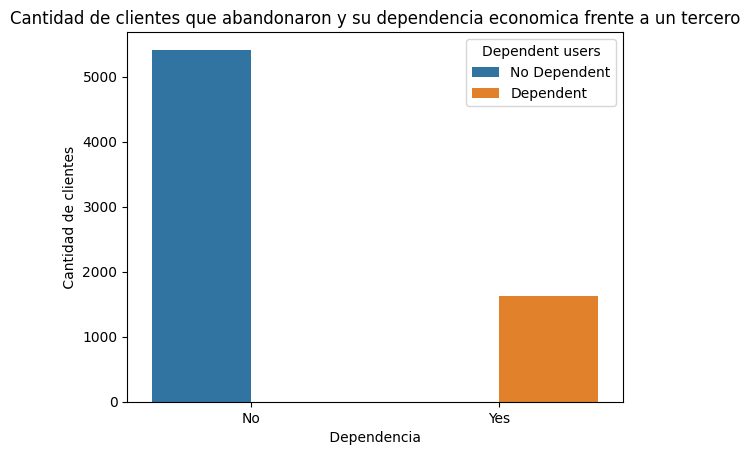

In [ ]:
# Existe relación entre la tasa de abandono vs los usuarios dependientes economicamente de terceros? Hay un motivo/razon de abandono sobresaliente de este grupo de clientes ?
data = df_services["Churn Value"]
group = data = df_services["Tabla_Clients.Dependents"]

# Count plot
sns.countplot(x = data, hue = group).set_title('Cantidad de clientes que abandonaron y su dependencia economica frente a un tercero')
legend = plt.legend(['No Dependent','Dependent'], title = "Dependent users")
plt. xlabel (' Dependencia ')
plt. ylabel (' Cantidad de clientes ')
plt.show()

##**Análisis y recomendación**

**Análisis**

En este grafico se esta usando el KPI de churn que indica cuando un cliente se reporta como fuera de la empresa, calificando un valor de 1 para cliente perdido y 0 como cliente activo y el KPI de clientes dependientes de un tercero.

Para poder relacionar estos clientes con la tasa de abandono es necesario reconocer de esos usuarios dependientes cuales abandonaron por motivos economicos, es decir, decidieron dejar la empresa por otras alternativas de servicio con la competencia. De 7043 usuarios perdidos, + de 1000 estan abandonando y son dependientes lo que puede indicar que estos usuarios estan optando por retirarse ya que

1.la empresa no esta cumpliendo con los estandares a nivel de calidad 

2.tienen un precio muy elevado vs la calidad del servicios 

3.la competencia brinda mejores ofertas precio vs calidad

Se podria hacer una profundizacion para reconocer dentro de esta variables (clientes dependientes y perdidos) cuales de ellos reportaron como razon de churn las siguientes: Competitor made better offer, Competitor had better devices, Competitor offered higher download speeds y Competitor offered more data.

**Recomendación**

Los clientes dependientes de terceros perdidos son mas de 1.500 como se puede observar en el grafico, las razones pueden ser distintas y estar relacionadas a factores de precio/economia, para este tipo de usuario se podría acudir a herramientas comerciales que les permitan acceder a los servicios a precios más asequibles y con métodos de pago o formas de financiación que se ajusten a sus ingresos y presupuesto mensuales. Se puede hacer un análisis de los ingresos de los usuarios y segmentarlos y así ofrecer planes que se ajusten a sus necesidades.

## *Pregunta 5) Existe impacto del churn score debido a zona geografica*

In [ ]:
# Datos con latitud/longitud y valores

fig = px.density_mapbox (df_services, lat = 'Tabla_Clients.Latitude', lon = 'Tabla_Clients.Longitude', z = 'Churn Score',  radius = 8,  zoom = 6 , mapbox_style = 'open-street-map')
fig.show() 

##**Análisis y recomendación**

**Análisis**

Se puede ver que hay una gran dispersión de los datos alrededor del estado de California, sin embargo, se puede ver que se crean grupos en la parte de la costa y otros en el interior del estado que reportan churn scores mayores a los 40. Hay zonas que comienzan a agrupar varios datos dentro del territorios mientras que otras donde los datos estan separados notoriamente, estos presentan valores muy cercanos a los 100.

**Recomendación**

Se podría hacer una agrupación por sectores para obervar el promedio del churn score en estas ubicaciones greograficas y mirar si en aquellas bastantes cercanas al 100 una posible causa es la calidad del servicio alrededor del área esto podría atribuirse al alto número de usuarios y a la falta de rápida e idónea conectividad que la empresa está otorgando ya que no dimensiona la densidad de la población.